# Titanic Assignment

### Predict survival on the Titanic
###  Defining the problem statement
### Collecting the data
### Exploratory data analysis
### Feature engineering
### Modelling

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC


# metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


# Collecting the data

### load titanic dataset using Pandas

In [3]:
# Reading the dataset

titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

### There are al together 891 rows and 12 columns. 
### Out of 12 columns 11 are features and 1 is target that is Survived

# Columns details

### Exploratory data analysis

In [5]:
# Variable defination

# PassengerId 
# Survuved
# Pclass = Ticket class
# Sex = Sex
# Age = Age in Years
# SibSp = siblings and spouse around the Titanic
# parch = parents and children around the Titanic
# Ticket = Ticket number
# Fare = Passenger Fare
# Cabin = Cabin number
# Embarked = Port of Embarkation  [ c = Cherbourg,  Q = Queenstown, S = Southhampton]

In [6]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### From the above dataset we can see that there are 5 columns in integers , 5 columns in object and 2 columns in float

In [7]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### From the above dataset we can see that there is an missing value in age and cabin columns

# DATA WRANGLING - Handling the Missing values and Data cleaning 

In [8]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [9]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [11]:
print(titanic_data['Embarked'].mode()[0])

S


In [12]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [13]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### From the above table we can find out that min row have zero value.
### In few columns there are skweness as well.
### There is no missing values in the dataset.

In [78]:
# replacing all the zero values 

titanic_data['Fare'] = titanic_data['Fare'].replace(0,titanic_data['Fare'].mean())
titanic_data['Survived'] = titanic_data['Survived'].replace(0,titanic_data['Survived'].mode()[0])
titanic_data['Parch'] = titanic_data['Parch'].replace(0,titanic_data['Parch'].mode()[0])
titanic_data['SibSp'] = titanic_data['SibSp'].replace(0,titanic_data['SibSp'].mode()[0])

### Replacing all the zero value in minimum rows with the help of mean and mode

In [15]:
# removing the duplicates

titanic_data.drop_duplicates(inplace = True)
titanic_data.shape

(891, 11)

### With the help of duplicate command we can see check whether there is any duplicate data in dataset or not.

# Encoding the Categorical Columns

In [16]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [20]:
# get a count of surviors in the ship

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

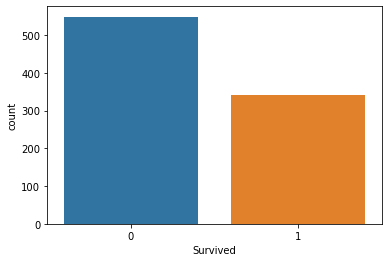

In [21]:
# visualize the count of survivors
sns.countplot(titanic_data['Survived'])

### From the above count plot we can find out that there are 549 people died and 342 people survived.

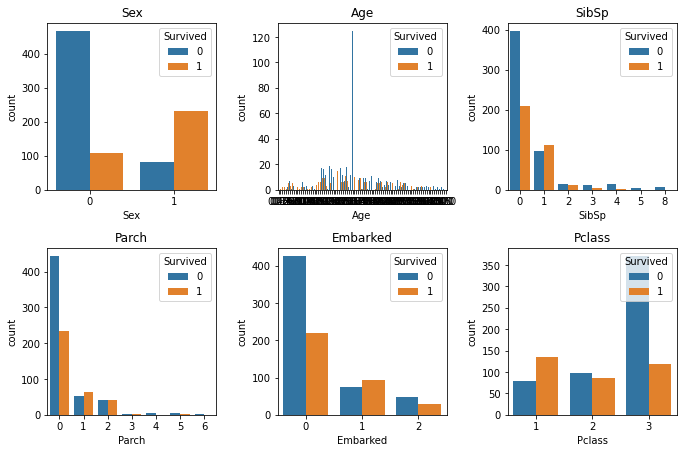

In [22]:
# visualize the count of columns for survivors in this dataset ('sex','Pclass','Age','SibSp','Parch','Embarked')

columns = ['Sex','Age','SibSp','Parch','Embarked','Pclass']
n_rows = 2
n_columns = 3

# the subplots grid size of each graph
fig, axs = plt.subplots(n_rows,n_columns, figsize = (n_columns * 3.2, n_rows * 3.2))
for r in range(0,n_rows):
    for c in range(0,n_columns):
        
        i=r*n_columns + c # index go through the number of columns
        ax = axs[r][c] # show where to position each subplot
        sns.countplot(titanic_data[columns[i]], hue=titanic_data['Survived'], ax=ax)
        ax.set_title(columns[i])
        ax.legend(title='Survived', loc='upper right')
        
plt.tight_layout()        

In [23]:
# look at the survived rate by sex and Pclass visuality
titanic_data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
0,0.368852,0.157407,0.135447
1,0.968085,0.921053,0.500000


<AxesSubplot:xlabel='Sex'>

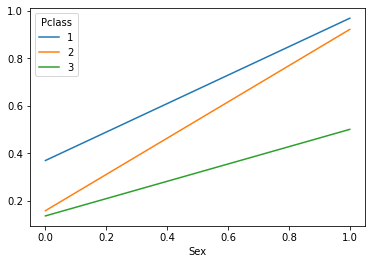

In [24]:
titanic_data.pivot_table('Survived', index='Sex', columns='Pclass').plot()

### With the help of pivot table we can ananlyze the survival rate of sex and plcass.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

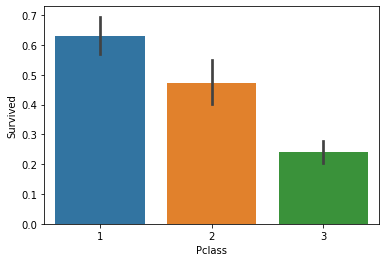

In [25]:
# look at the survived rate of each Pclass(0,1,2)

sns.barplot(x='Pclass', y ='Survived', data=titanic_data)

### With the help of bar plot we can ananlyze the survival rate of plcass.

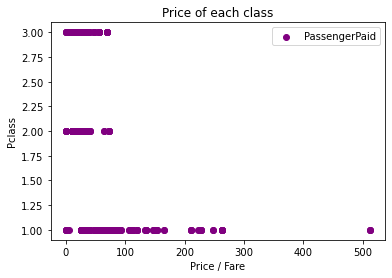

In [27]:
# Plot the fares of each classes 
plt.scatter(titanic_data['Fare'],titanic_data['Pclass'],color='purple', label='PassengerPaid')
plt.ylabel('Pclass')
plt.xlabel('Price / Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

### With the help of scatter plot we can ananlyze the fare of each class.

# BOX PLOT

### Finding outliers

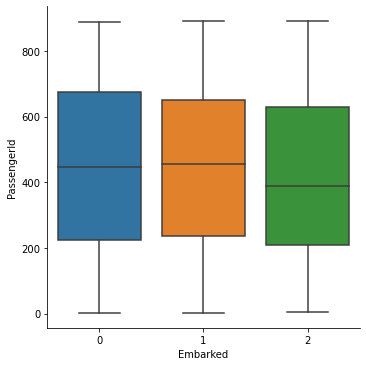

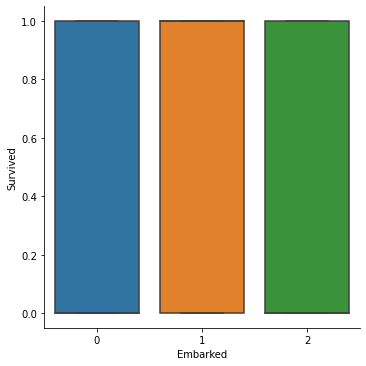

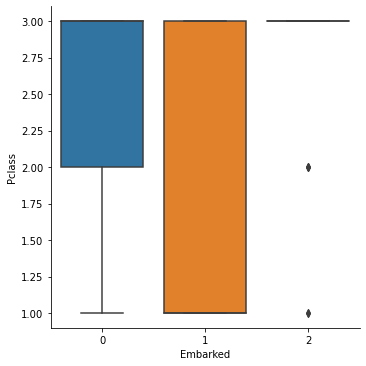

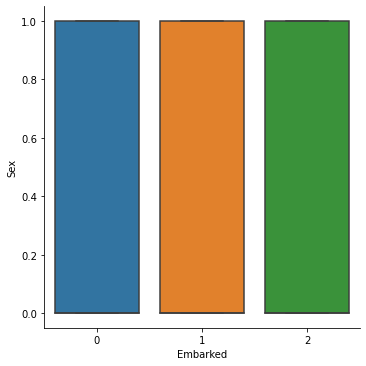

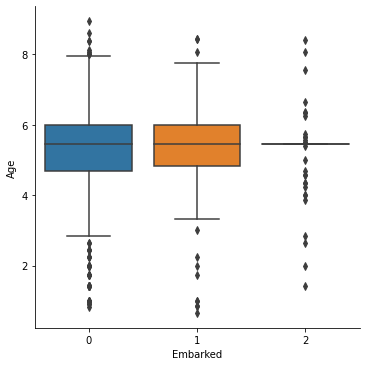

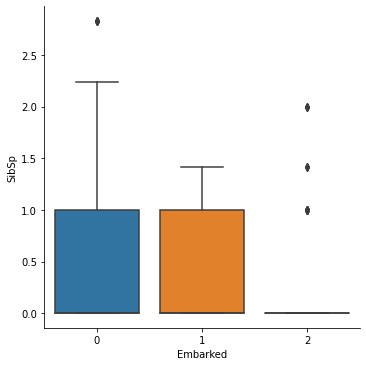

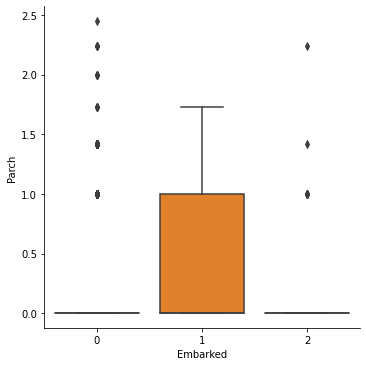

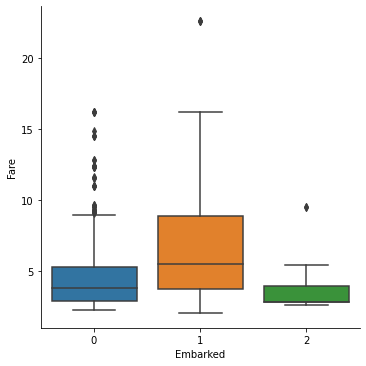

In [79]:
sns.catplot(x="Embarked", y="PassengerId", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Survived", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Pclass", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Sex", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Age", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="SibSp", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Parch", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Fare", data=titanic_data, kind="box");

In [29]:
from scipy.stats import skew

### Heatmap

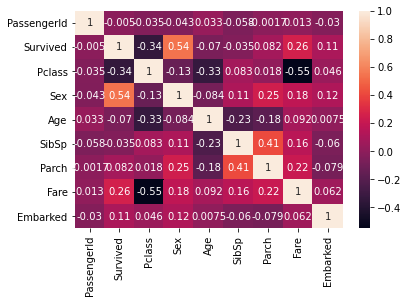

In [30]:
sns.heatmap(titanic_data.corr(),annot=True)
plt.show()

# Removing outliers

In [31]:
titanic_data["Fare"] = np.sqrt(titanic_data["Fare"])

In [32]:
skew(titanic_data["Fare"])

2.081492666998587

In [33]:
titanic_data["Parch"] = np.sqrt(titanic_data["Parch"])

In [34]:
skew(titanic_data["Parch"])

1.5272224486562416

In [35]:
titanic_data["SibSp"] = np.sqrt(titanic_data["SibSp"])

In [36]:
skew(titanic_data["SibSp"])

1.4341069481300392

In [37]:
titanic_data["Age"] = np.sqrt(titanic_data["Age"])

In [38]:
skew(titanic_data["Age"])

-0.824053479771403

### We have removed the outliers from fare, parch, sibsp, age.

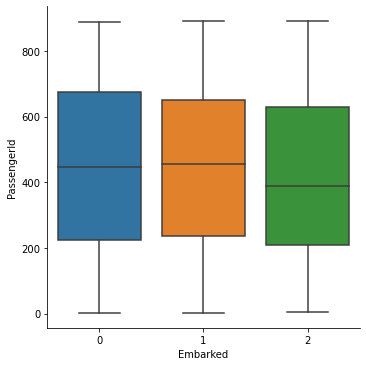

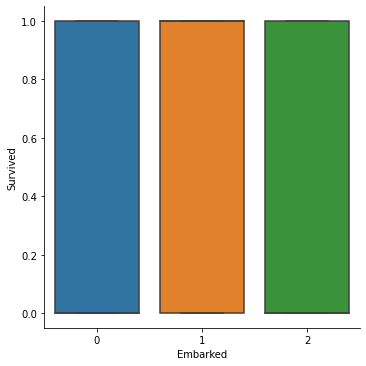

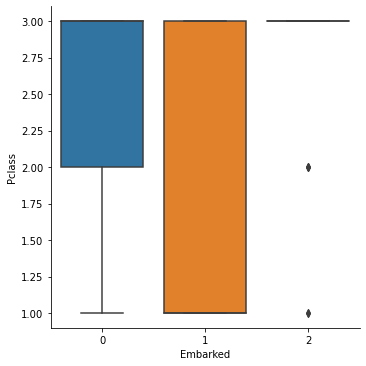

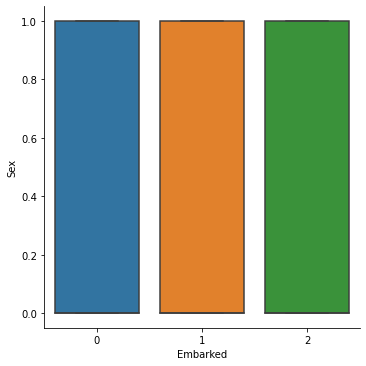

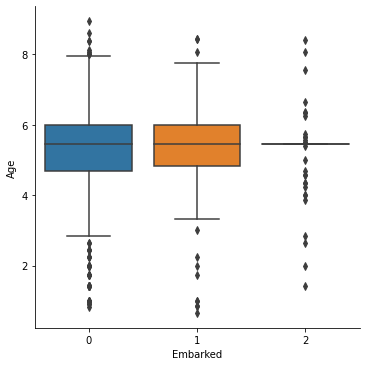

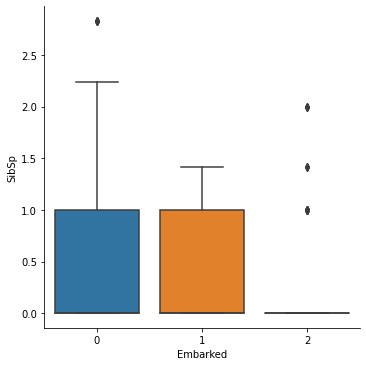

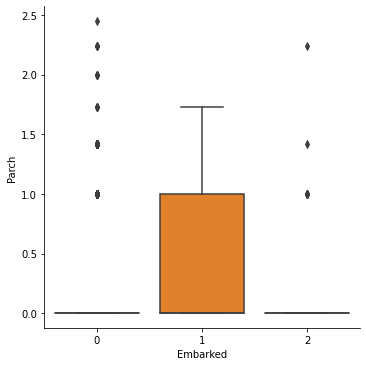

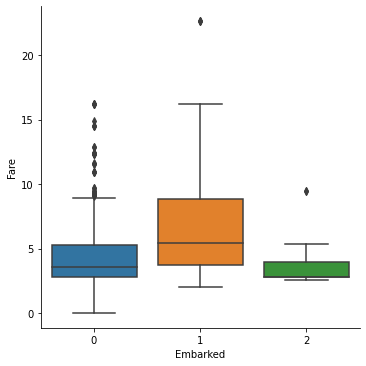

In [39]:
#After Removing checking again the outliers 
sns.catplot(x="Embarked", y="PassengerId", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Survived", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Pclass", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Sex", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Age", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="SibSp", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Parch", data=titanic_data, kind="box")
sns.catplot(x="Embarked", y="Fare", data=titanic_data, kind="box");

In [40]:
# after removing the skewness we are loading the dataset again.

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,4.690416,1.0,0.0,A/5 21171,2.692582,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6.164414,1.0,0.0,PC 17599,8.442944,1
2,3,1,3,"Heikkinen, Miss. Laina",1,5.099020,0.0,0.0,STON/O2. 3101282,2.815138,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.916080,1.0,0.0,113803,7.286975,0
4,5,0,3,"Allen, Mr. William Henry",0,5.916080,0.0,0.0,373450,2.837252,0


In [41]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,5.284934,0.385286,0.293409,4.851220,0.361392
std,257.353842,0.486592,0.836071,0.477990,1.330631,0.612359,0.543909,2.946119,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.648074,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,4.690416,0.000000,0.000000,2.812542,0.000000
50%,446.000000,0.000000,3.000000,0.000000,5.449690,0.000000,0.000000,3.801868,0.000000
75%,668.500000,1.000000,3.000000,1.000000,5.916080,1.000000,0.000000,5.567764,1.000000
max,891.000000,1.000000,3.000000,1.000000,8.944272,2.828427,2.449490,22.634690,2.000000


# Separating features & Target

In [42]:
x = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [43]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,4.690416,1.0,0.0,2.692582,0
1,1,1,6.164414,1.0,0.0,8.442944,1
2,3,1,5.099020,0.0,0.0,2.815138,0
3,1,1,5.916080,1.0,0.0,7.286975,0
4,3,0,5.916080,0.0,0.0,2.837252,0


# StandardScaler

In [44]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.82737724, -0.73769513, -0.44704517, ..., -0.53974741,
        -0.73311679, -0.56883712],
       [-1.56610693,  1.35557354,  0.66132096, ..., -0.53974741,
         1.21982216,  1.00518113],
       [ 0.82737724,  1.35557354, -0.13979747, ..., -0.53974741,
        -0.69149455, -0.56883712],
       ...,
       [ 0.82737724,  1.35557354,  0.12388733, ...,  2.06180484,
        -0.00295453, -0.56883712],
       [-1.56610693, -0.73769513, -0.13979747, ..., -0.53974741,
         0.21260431,  1.00518113],
       [ 0.82737724, -0.73769513,  0.27966376, ..., -0.53974741,
        -0.70210954,  2.57919938]])

### Using the standard scaler method to bring all the data in same range for model prediction


# VIF - variance inflation factor

In [45]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.168253,Pclass
1,1.128194,Sex
2,1.256225,Age
3,1.426595,SibSp
4,1.534405,Parch
5,2.397229,Fare
6,1.051483,Embarked


### From vif score i have tried to find out which features are strongly related to each other. However there is no vif score above 5 so we are good to with all the features.

# Using SelectKBest feature Selection Method

In [46]:
best_features = SelectKBest(score_func=f_classif, k=5)
fit = best_features.fit(x,y)
titanic_data_scores = pd.DataFrame(fit.scores_)
titanic_data_columns = pd.DataFrame(x.columns)

# concatenate dataframe

feature_scores = pd.concat([titanic_data_columns,titanic_data_scores],axis=1)
feature_scores.columns = ['Feature Name','Score']
print(feature_scores.nlargest(5,'Score'))   # print 6 features

# export selected features to csv
titanic_data_univ_feat = feature_scores.nlargest(9,'Score')

titanic_data_univ_feat.to_csv('variable_selection.csv',index = False)

  Feature Name       Score
1          Sex  372.405724
0       Pclass  115.031272
5         Fare   96.217443
4        Parch   13.354078
6     Embarked   10.259355


# Model Building

### Splitting the data into training data & Test data

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [48]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 123.5+ KB


# Logistic Regression model

In [49]:
# predicting logistic regression

clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7802690582959642


In [51]:
# confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[114,  19],
       [ 30,  60]], dtype=int64)

In [52]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       133
           1       0.76      0.67      0.71        90

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



## Logistic Regression model - 78%

## Cross Validation (K-fold)

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# KNeigkhbors model¶

In [54]:
# predicting KNeigkhbors

clf = KNeighborsClassifier()
clf.fit(x_train,y_train)


KNeighborsClassifier()

In [55]:
y_pred = clf.predict(x_test)

In [56]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[119,  14],
       [ 33,  57]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       133
           1       0.80      0.63      0.71        90

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223



### Cross Validation of Knn model -- checking whether the model is overfitting

In [58]:
# cross validation of knn

cross_val_score(clf,x_scaled,y,cv=3)

array([0.79461279, 0.81818182, 0.81818182])

In [59]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=3).mean()

0.8103254769921437

#### GridSearchCV

In [60]:
param_grid = {'algorithm':['kdtree','brute'],
               'leaf_size':[15,18,20],
               'n_neighbors':[3,15,7,13]
             }

gridsearch = GridSearchCV(clf,param_grid)
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 3}

In [61]:
# we will use the best parameter in our knn algorithms and check if the accuracy is increasing

clf = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=13)

In [62]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [63]:
# confusion matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[118,  15],
       [ 30,  60]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       133
           1       0.80      0.67      0.73        90

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.79       223



## KNeigkhbors model - 80%

# Decision Tree

In [65]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Cross Validation of Decison Tree model - checking whether the model is overfitting

In [66]:
# we are tunning 3 hyper parameter right now, we are pssing the different for both parameter

grid_param = {
     'criterion': ['gini','entropy'],
     'max_depth': range(2,10,3),
     'min_samples_leaf': range(1,10,2),
     'min_samples_split': range(2,10,2)
     }

In [67]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 3,
                          n_jobs = -1)

In [68]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [69]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [70]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = 5, min_samples_leaf = 5, min_samples_split = 2)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8071748878923767

In [71]:
y_pred = clf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred)

0.8071748878923767

In [73]:
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       133
           1       0.81      0.68      0.74        90

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



## Decision Tree - 81%

# Conclusion

## According to the above 3 model prediction the best model is Decision Tree Model - 81%

# Saving the model

In [80]:
import pickle

In [81]:
# saving the Decision Tree Model

filename = 'finalized_model.pickle'
pickle.dump(clf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))